In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Predictin Price of House using KNerestNeighbors Regressor

## Importing data 

In [2]:
data = pd.read_csv('house_rental_data.csv.txt')
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
# Checking for null values in dataset
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [4]:
# Checking the types of data of each columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [5]:
# Droping Unnamed: 0 from the dataset
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [6]:
dic = {'Living.Room':'LivingRoom'}
data = data.rename(dic,axis=1)
data.head()

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [7]:
data.LivingRoom.unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [8]:
# Describing dataset
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


### Checking for Outliers in dataset

<AxesSubplot:>

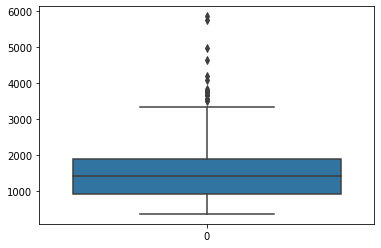

In [9]:
# Checking for outliers in each columns using boxplot method
sns.boxplot(data['Sqft'])

'Sqft' have outliers above upper whisker.

<AxesSubplot:>

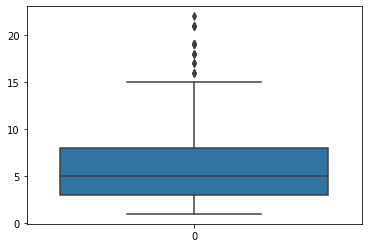

In [10]:
# for Floor columns
sns.boxplot(data['Floor'])

<AxesSubplot:>

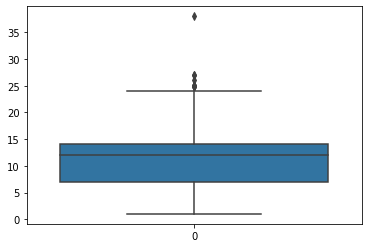

In [11]:
# for TotalFloor column
sns.boxplot(data['TotalFloor'])

<AxesSubplot:>

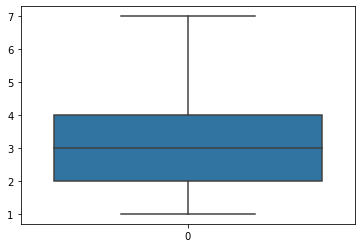

In [12]:
# for Bedroom column
sns.boxplot(data['Bedroom'])

Bedroom column have no outliers.

<AxesSubplot:>

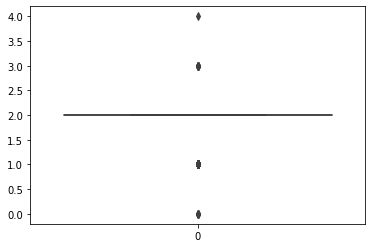

In [13]:
sns.boxplot(data['LivingRoom'])

<AxesSubplot:>

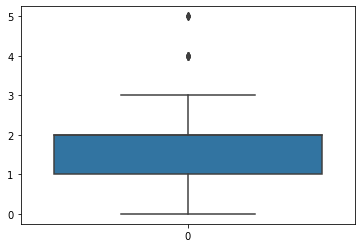

In [14]:
sns.boxplot(data['Bathroom'])

<AxesSubplot:>

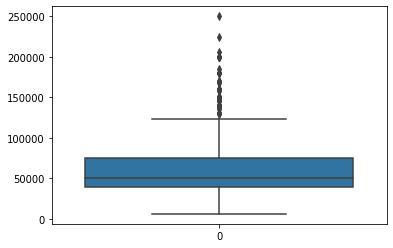

In [15]:
sns.boxplot(data['Price'])

### Removing the outliers from the data cause having outliers in the data can cause missleading.

In [16]:
q3 = data['Price'].quantile(0.75)
q1 = data['Price'].quantile(0.25)
iqr = q3-q1
print(q3,q1)
print(f"iqr : {iqr}")

75000.0 39000.0
iqr : 36000.0


In [17]:
# number of outliers in Price
data[data['Price']>q3+1.5*iqr].Price.count()

41

In [18]:
data['Price']=np.where(data['Price']>data['Price'].quantile(0.80),data['Price'].quantile(0.80),data['Price'])

<AxesSubplot:>

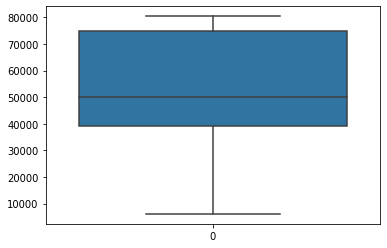

In [19]:
sns.boxplot(data['Price'])

In [20]:
data[data['Price']>q3+1.5*iqr].Price.count()

0

All the Outliers from the Price column is fixed.

In [21]:
# Removing outliers from Sqft column
q3 = data['Sqft'].quantile(0.75)
q1 = data['Sqft'].quantile(0.25)
iqr = q3-q1
print(f"q3:{q3}, q1:{q1} and iqr:{iqr}")

q3:1892.856, q1:925.08 and iqr:967.776


In [22]:
# Counting the numbers of outliers in Sqft column
data[data['Sqft']>q3+1.5*iqr]['Sqft'].count()

16

In [23]:
data['Sqft'] = np.where(data['Sqft']>data['Sqft'].quantile(0.80),data['Sqft'].quantile(0.80),data['Sqft'])

In [24]:
data[data['Sqft']>q3+1.5*iqr]['Sqft'].count()

0

<AxesSubplot:>

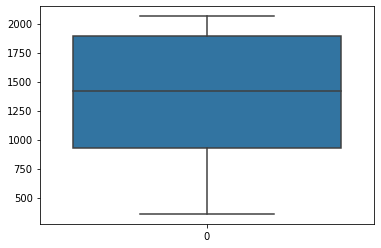

In [25]:
sns.boxplot(data['Sqft'])

All the outliers of the Sqft is fixed.

In [26]:
# Counting the no. of outliers from Floor columns
q3=data['Floor'].quantile(0.75)
q1 = data['Floor'].quantile(0.25)
iqr = q3-q1
print(f"q3: {q3}, q1: {q1} and iqr: {iqr}")

q3: 8.0, q1: 3.0 and iqr: 5.0


In [27]:
data[data['Floor']>q3+1.5*iqr].Floor.count()

19

In [28]:
data['Floor'] = np.where(data['Floor']>data['Floor'].quantile(0.8),data['Floor'].quantile(0.8),data['Floor'])

In [29]:
data[data['Floor']>q3+1.5*iqr].Floor.count()

0

All the of Floor columns have been removed.

In [30]:
# Removing outliers from the TotalFloor column.
q3 = data['TotalFloor'].quantile(0.75)
q1 = data['TotalFloor'].quantile(0.25)
iqr = q3-q1
print(f"q3: {q3},q1: {q1} and iqr: {iqr}")

q3: 14.0,q1: 7.0 and iqr: 7.0


In [31]:
# Count of outliers in TotalFloor column
data[data['TotalFloor']>q3+1.5*iqr].TotalFloor.count()

14

In [32]:
data['TotalFloor'] = np.where(data['TotalFloor']>data['TotalFloor'].quantile(.8),data['TotalFloor'].quantile(.8),data['TotalFloor'])

In [33]:
# Count of outliers after fixing it
data[data['TotalFloor']>q3+1.5*iqr].TotalFloor.count()

0

All the outliers form TotalFloor column have been fixed.

In [34]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1405.018344,5.305426,10.010853,2.837209,1.813953,1.810853,54129.186047
std,514.159755,2.583040,3.493766,1.010740,0.462364,0.683574,19047.085361
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,2063.640000,9.000000,14.000000,7.000000,4.000000,5.000000,80400.000000


All the Outliers form the data have been fixed now we are going to nomalize the data cause differene between range

In [35]:
x = data.drop('Price',axis=1)
y = data['Price']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [38]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [39]:
y_pred=knr.predict(x_test)

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6763494827372722

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [42]:
# x = ss.fit_transform([x[['Sqft','Floor','TotalFloor','Bedroom','LivingRoom','Bathroom']]])
# x.describe()
# data = ss.fit_transform(data[['Sqft','Floor','TotalFloor','Bedroom','LivingRoom','Bathroom']])

In [43]:
data

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
0,1177.698,2.0,7.0,2,2,2,62000.0
1,2063.640,5.0,7.0,4,2,2,78000.0
2,1138.560,5.0,7.0,2,2,1,58000.0
3,1458.780,2.0,7.0,3,2,2,45000.0
4,967.776,9.0,14.0,3,2,2,45000.0
...,...,...,...,...,...,...,...
640,1359.156,7.0,14.0,3,2,2,45000.0
641,377.148,4.0,10.0,1,1,1,24800.0
642,740.064,9.0,14.0,1,1,1,45000.0
643,1707.840,3.0,14.0,3,2,2,65000.0


In [44]:
df = data.copy()
df.head()

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
0,1177.698,2.0,7.0,2,2,2,62000.0
1,2063.640,5.0,7.0,4,2,2,78000.0
2,1138.560,5.0,7.0,2,2,1,58000.0
3,1458.780,2.0,7.0,3,2,2,45000.0
4,967.776,9.0,14.0,3,2,2,45000.0


In [45]:
df[['Sqft','Floor','TotalFloor','Bedroom','LivingRoom','Bathroom']]=ss.fit_transform(df[['Sqft','Floor','TotalFloor','Bedroom','LivingRoom','Bathroom']])

In [46]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
0,-0.442463,-1.280658,-0.862447,-0.828956,0.402694,0.276918,62000.0
1,1.281961,-0.118335,-0.862447,1.151328,0.402694,0.276918,78000.0
2,-0.518643,-0.118335,-0.862447,-0.828956,0.402694,-1.187117,58000.0
3,0.104643,-1.280658,-0.862447,0.161186,0.402694,0.276918,45000.0
4,-0.851062,1.431430,1.142676,0.161186,0.402694,0.276918,45000.0


In [47]:
x = df.drop('Price',axis=1)
y=df['Price']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [49]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [50]:
y_pred = knr.predict(x_test)

In [51]:
r2_score(y_test,y_pred)

0.6139118778974733

In [52]:
y_pred


array([62080. , 52240. , 37600. , 54000. , 29600. , 80400. , 75320. ,
       77320. , 32377.6, 49999.8, 42000. , 43400. , 31500. , 46317.6,
       80320. , 67560. , 79320. , 42200. , 36960. , 31360. , 79919.8,
       37605.6, 77320. , 45539.8, 75320. , 34400. , 51280. , 80400. ,
       42777.6, 46160. , 80320. , 32459.8, 56640. , 68840. , 42577.6,
       34460. , 42200. , 72440. , 80400. , 73840. , 43624. , 80400. ,
       68480. , 29600. , 42600. , 80400. , 74600. , 35599.8, 42600. ,
       71080. , 46800. , 46160. , 25720. , 63500. , 71080. , 78920. ,
       77199.6, 43159.8, 34600. , 80400. , 41760. , 75320. , 53600. ,
       46160. , 80400. , 72080. , 33900. , 41000. , 36960. , 77520. ,
       80400. , 72079.8, 70577.6, 33612.8, 67160. , 44799.6, 64200. ,
       55000. , 67600. , 56300. , 32377.6, 66680. , 62360. , 49240. ,
       41000. , 65977.6, 69080. , 55200. , 36000. , 30806.4, 41000. ,
       80400. , 74399.8, 49240. , 75320. , 35600. , 80400. , 46199.8,
       79320. , 2252

In [53]:
y_test

215    45000.0
130    75000.0
31     80400.0
604    50000.0
363    39000.0
        ...   
603    21000.0
211    35000.0
456    36000.0
556    38000.0
417    80400.0
Name: Price, Length: 129, dtype: float64